# Nessesery libraries and functions 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

c:\Users\ADMIN\anaconda3\envs\mediapipe\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def train_model(X, Y, X_test, Y_test, model_type, epochs, sample_size, hidden_units, seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_test = scaler.transform(X_test)

    X, Y= np.array([X[i:i+sample_size] for i in range(X.shape[0]-sample_size)]), np.array(Y[sample_size:])
    X_test, Y_test= np.array([X_test[i:i+sample_size] for i in range(X_test.shape[0]-sample_size)]), np.array(Y_test[sample_size:])

    if model_type=="RNN":
        print("A")
        model = Sequential([SimpleRNN(hidden_units, input_shape=(sample_size, 99), activation='tanh'), 
                            Dense(5, activation='softmax') ])
        model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    elif model_type=="GRU":
        print("B")
        model = Sequential([GRU(hidden_units, input_shape=(sample_size, 99), activation='tanh'), 
                            Dense(5, activation='softmax') ])
        model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    elif model_type=="LSTM":
        print("C")
        model = Sequential([LSTM(hidden_units, input_shape=(sample_size, 99), activation='tanh'),
                            Dense(5, activation='softmax') ])
        model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    print("X",X.shape)
    print("X_test",X_test.shape)
    training_time=time.time()
    history=model.fit(X, Y, validation_data=(X_test, Y_test), epochs=epochs, shuffle=True)
    
    training_time=time.time()-training_time
    output_time=time.time()
    example_n=10
    for example in range(example_n):
        model.predict(X_test[example].reshape(1,sample_size, 99))
    output_time=(time.time()-output_time)/example_n
    return history, training_time, output_time, model, scaler

# Load data

In [3]:
X_train_data_0=pd.read_csv("data/big_dataset/data_3D/train/train_2.csv").drop(columns=["Unnamed: 0"])
X_train_data_0=np.array(X_train_data_0)[2500:5000]#[2500:5000]

X_train_data_1=pd.read_csv("data/big_dataset/data_3D/train/train_1.csv").drop(columns=["Unnamed: 0"])
X_train_data_1=np.array(X_train_data_1)[2500:5000]#[2500:5000]

X_train_data=np.concatenate((X_train_data_0, X_train_data_1), axis=0, out=None, dtype=None)

X_test_data_0=pd.read_csv("data/big_dataset/data_3D/train/train_2.csv").drop(columns=["Unnamed: 0"])
X_test_data_0=np.array(X_test_data_0)[:2500]

X_test_data_1=pd.read_csv("data/big_dataset/data_3D/train/train_1.csv").drop(columns=["Unnamed: 0"])
X_test_data_1=np.array(X_test_data_1)[:2500]

X_test_data=np.concatenate((X_test_data_0, X_test_data_1), axis=0, out=None, dtype=None)

In [4]:
#train
file_path = "data/big_dataset/data_3D/train/Main_2/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_train_data_0=[None for e in range(X_train_data_0.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[2500:5000]): #[2500:5000]

        if example[-2:]==" 1":
            Y_train_data_0[id]=categories.index(cat)

file_path = "data/big_dataset/data_3D/train/Main_1/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_train_data_1=[None for e in range(X_train_data_1.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[2500:5000]): #[2500:5000]
        if example[-2:]==" 1":
            Y_train_data_1[id]=categories.index(cat)
Y_train_data=np.concatenate((Y_train_data_0, Y_train_data_1), axis=0, out=None, dtype=None)

#test
file_path = "data/big_dataset/data_3D/train/Main_2/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_test_data_0=[None for e in range(X_test_data_0.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[:2500]):
        if example[-2:]==" 1":
            Y_test_data_0[id]=categories.index(cat)

file_path = "data/big_dataset/data_3D/train/Main_1/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_test_data_1=[None for e in range(X_test_data_1.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[:2500]):
        if example[-2:]==" 1":
            Y_test_data_1[id]=categories.index(cat)
Y_test_data=np.concatenate((Y_test_data_0, Y_test_data_1), axis=0, out=None, dtype=None)


In [5]:
# for elem in range(10000):
#     if X_test_data[elem] in X_train_data:
#         print("a")

In [17]:
for elem in range(10):
    print(X_test_data_0[elem][0])

2.4638119530462887
2.267295106496052
2.2041643789549257
2.1683519407418133
2.0696203885572078
1.8417092095534584
1.6940975757798564
1.4387185300965184
1.2774472923757725
1.2098650745201225


In [7]:
print(len(X_train_data))
print(len(X_test_data))
print(len(Y_train_data))
print(len(Y_test_data))

5000
5000
5000
5000


In [8]:
None in Y_train_data

False

In [9]:
import tensorflow as tf

# Ustaw GPU jako urządzenie domyślne
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("Trening będzie wykonywany na GPU:", gpus[0])
    except RuntimeError as e:
        print(e)


Trening będzie wykonywany na GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [9]:
# X_train_data=pd.read_csv("data/small_dataset/data_3D/train/train.csv").drop(columns=["Unnamed: 0"])
# display(X_train_data.head())
# X_train_data=np.array(X_train_data)

# X_test_data=pd.read_csv("data/small_dataset/data_3D/test/test.csv").drop(columns=["Unnamed: 0"])
# display(X_test_data.head())
# X_test_data=np.array(X_test_data)

In [10]:
# file_path = "data/small_dataset/data_3D/train/Main/"
# categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
# Y_train_data=[None for e in range(X_train_data.shape[0])]
# for cat in categories:
#     with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
#         content = file.read() 
#     for id, example in enumerate(content.split("\n")):
#         if example[-2:]==" 1":
#             Y_train_data[id]=categories.index(cat)


# file_path = "data/small_dataset/data_3D/test/Main/"
# categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
# Y_test_data=[None for e in range(X_test_data.shape[0])]
# for cat in categories:
#     with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
#         content = file.read() 
#     for id, example in enumerate(content.split("\n")):
#         if example[-2:]==" 1":
#             Y_test_data[id]=categories.index(cat)

# Training model

In [18]:
import json
hidden_units_l = [4, 8, 16, 32, 64, 128, 256]
sample_size_l = [1, 3, 5, 10, 15, 20, 40] 
model_type_l = ["RNN", "GRU", "LSTM"]

hidden_units_l = [64]#64
sample_size_l = [5] 
model_type_l = ["RNN","LSTM"]

for model_type in model_type_l:
    for hidden_units in hidden_units_l:
        for sample_size in sample_size_l:
            history, training_time, output_time, model,_ = train_model(X_train_data, Y=Y_train_data, X_test=X_test_data, Y_test=Y_test_data, model_type=model_type, epochs=10, sample_size=sample_size, hidden_units=hidden_units, seed=42)            
            print(model.summary())
            # path=f"data/small_dataset/data_3D/train_history/model_type_{model_type} hidden_units_{hidden_units} sample_size_{sample_size}"
            # history.history["training_time"]=training_time
            # history.history["output_time"]=output_time
            # with open(path+".json", 'w') as f:
            #     json.dump(history.history, f)
            # model.save(path+".h5")

A
X (4995, 5, 99)
X_test (4995, 5, 99)
[[ 2.25742857e+00  2.83848710e-01 -2.18921945e+00  1.18307867e+00
   2.87930326e-01 -1.61362494e+00  1.99037667e+00  2.69807576e-01
  -2.17752598e+00  2.30064746e+00  2.37250446e-01 -2.26600769e+00
   1.75822271e+00  2.93200061e-01 -1.94665435e+00  2.02466292e+00
   2.95165700e-01 -2.04223766e+00  2.03350726e+00  2.90561520e-01
  -1.99187636e+00  2.64895987e+00  1.28743610e-01 -2.26010949e+00
   2.38709213e+00  2.79356843e-01 -2.14613054e+00  2.08880938e+00
   2.04604955e-01 -2.01677663e+00  2.40463730e+00  2.40531474e-01
  -2.09855546e+00  1.14940293e-01 -4.17733543e-02 -1.17857646e-01
   1.07050432e+00  3.18294732e-01 -1.11911324e+00  3.09472384e+00
  -5.15797254e-01 -2.21036429e+00  4.63306368e-01  4.91459484e-02
  -1.52612792e+00  5.24515605e-02 -1.38135565e-01 -1.47090217e-02
   8.72674641e-02  1.74086686e-02 -1.29637785e-01  6.37412025e-01
  -2.35712392e-01 -3.55771320e-01  2.75903273e-02  2.80159660e-02
  -5.88787129e-01  1.04465060e+00 -1.

KeyboardInterrupt: 

In [ ]:
print(len(X_train_data))
print(len(X_test_data))
print(len(Y_train_data))
print(len(Y_test_data))

<Figure size 1200x800 with 0 Axes>

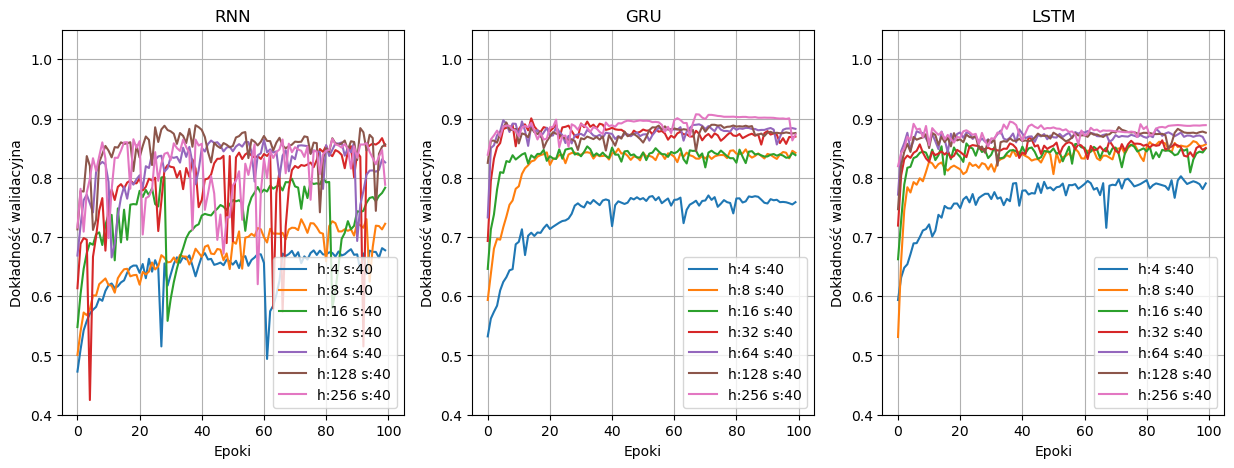

In [13]:
import json 
hidden_units_l = [4, 8, 16, 32, 64, 128, 256]
sample_size_l=[40]
# hidden_units_l = [64]
# sample_size_l = [80, 160, 320]

model_type_l = ["RNN", "GRU", "LSTM"]
colors = [f'C{id}' for id in range(len(hidden_units_l)) ] 

plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ind_a, ax in enumerate(axes):
    for ind_h, hidden_units in enumerate(hidden_units_l):
        for ind_s, sample_size in enumerate(sample_size_l):
            path=f"data/small_dataset/data_3D/train_history/model_type_{model_type_l[ind_a]} hidden_units_{hidden_units} sample_size_{sample_size}.json"
            with open(path, 'r') as f:
                history = json.load(f)
            ax.plot(history['val_accuracy'], label=f"h:{hidden_units} s:{sample_size}", color=colors[ind_h], linestyle="-")
            ax.set_xlabel('Epoki')
            ax.set_ylabel('Dokładność walidacyjna')
            ax.legend()
            ax.set_title(model_type_l[ind_a])
        ax.legend(loc='lower right')
        ax.grid()
        ax.set_xlim(-5,105)
        ax.set_ylim(0.4,1.05)

plt.show()

TypeError: 'AxesSubplot' object is not iterable

<Figure size 1200x800 with 0 Axes>

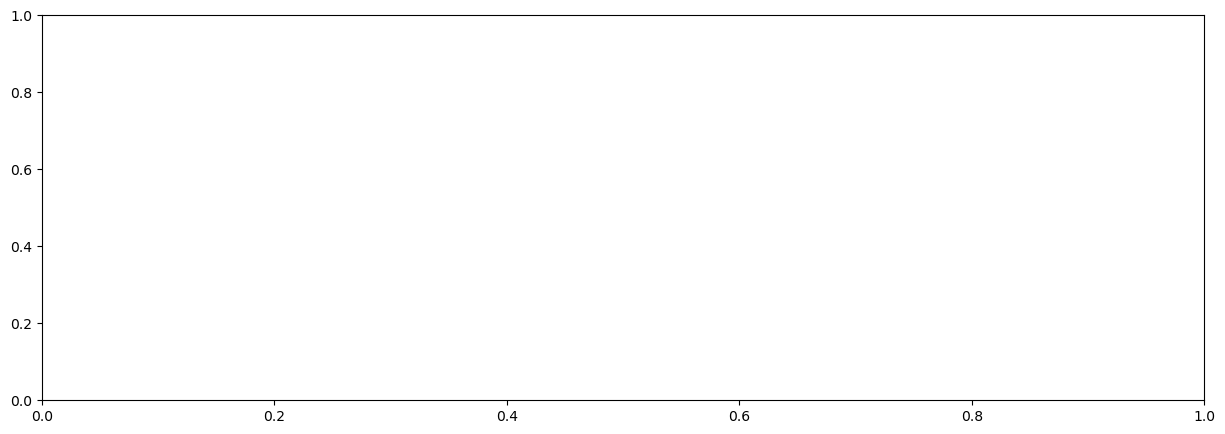

In [24]:
import json 
import matplotlib.pyplot as plt

hidden_units_l = [64]
sample_size_l = [1, 5, 10, 20, 40] 

model_type_l = ["RNN", "GRU", "LSTM"]
colors = [f'C{id}' for id in range(40) ] 
acc=1
type=["accuracy", "val_accuracy"]
label=['Accuracy', "Validation Accuracy"]

plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ind_a, ax in enumerate(axes):
    for ind_h, hidden_units in enumerate(hidden_units_l):
        for ind_s, sample_size in enumerate(sample_size_l):
            path=f"data/small_dataset/data_3D/train_history/model_type_{model_type_l[ind_a]} hidden_units_{hidden_units} sample_size_{sample_size}.json"
            with open(path, 'r') as f:
                history = json.load(f)
            ax.plot(history[type[acc]][:51], label=f"h:{hidden_units} s:{sample_size}", color=colors[ind_s], linestyle="-")
            ax.set_xlabel('Epoki')
            ax.set_ylabel('Dokładność (walidacja)')
            ax.legend()
            ax.set_title(model_type_l[ind_a])
        ax.legend(loc='lower right')
        ax.grid()
        # ax.set_xlim(-5,105)
        # ax.set_ylim(0.4,1.05)
        ax.set_xlim(-1,51)
        ax.set_ylim(0.53,0.92)
        
plt.savefig("3D_plots/Validation Accuracy sample_size.png")
plt.show()

<Figure size 1200x800 with 0 Axes>

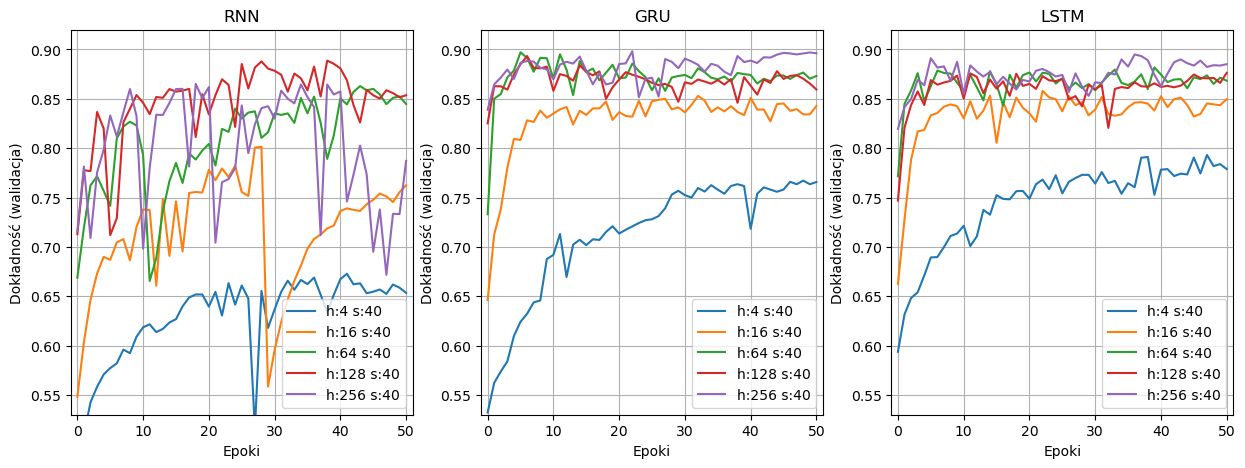

In [16]:
import json 
import matplotlib.pyplot as plt

hidden_units_l = [4, 16, 64, 128, 256]
sample_size_l = [40]

model_type_l = ["RNN", "GRU", "LSTM"]
colors = [f'C{id}' for id in range(40) ] 
acc=1
type=["accuracy", "val_accuracy"]
label=['Accuracy', "Validation Accuracy"]

plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ind_a, ax in enumerate(axes):
    for ind_h, hidden_units in enumerate(hidden_units_l):
        for ind_s, sample_size in enumerate(sample_size_l):
            path=f"data/small_dataset/data_3D/train_history/model_type_{model_type_l[ind_a]} hidden_units_{hidden_units} sample_size_{sample_size}.json"
            with open(path, 'r') as f:
                history = json.load(f)
            ax.plot(history[type[acc]][:51], label=f"h:{hidden_units} s:{sample_size}", color=colors[ind_h], linestyle="-")
            ax.set_xlabel('Epoki')
            ax.set_ylabel('Dokładność (walidacja)')
            ax.legend()
            ax.set_title(model_type_l[ind_a])
        ax.legend(loc='lower right')
        ax.grid()
        # ax.set_xlim(-5,105)
        # ax.set_ylim(0.4,1.05)
        ax.set_xlim(-1,51)
        ax.set_ylim(0.53,0.92)

plt.savefig("3D_plots/Validation Accuracy hidden_units.png")
plt.show()

<Figure size 1200x800 with 0 Axes>

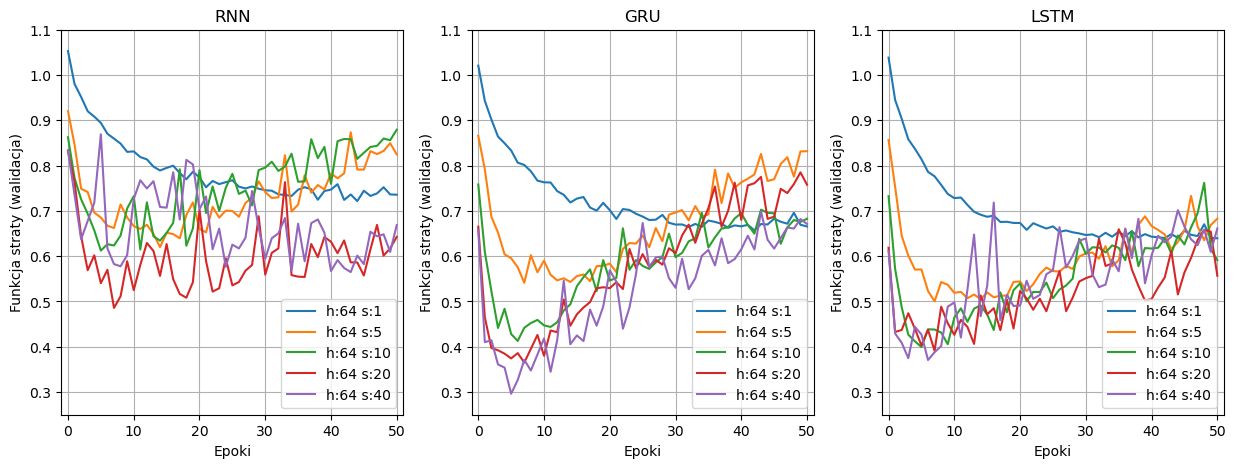

In [17]:
import json 
import matplotlib.pyplot as plt

hidden_units_l = [64]
# sample_size_l = [1, 3, 5, 10, 15, 20, 40] 
sample_size_l = [1, 5, 10, 20, 40] 

model_type_l = ["RNN", "GRU", "LSTM"]
colors = [f'C{id}' for id in range(40) ] 

plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ind_a, ax in enumerate(axes):
    for ind_h, hidden_units in enumerate(hidden_units_l):
        for ind_s, sample_size in enumerate(sample_size_l):
            path=f"data/small_dataset/data_3D/train_history/model_type_{model_type_l[ind_a]} hidden_units_{hidden_units} sample_size_{sample_size}.json"
            with open(path, 'r') as f:
                history = json.load(f)
            ax.plot(history['val_loss'][:51], label=f"h:{hidden_units} s:{sample_size}", color=colors[ind_s], linestyle="-")
            ax.set_xlabel('Epoki')
            ax.set_ylabel("Funkcja straty (walidacja)")
            ax.legend()
            ax.set_title(model_type_l[ind_a])
        ax.legend(loc='lower right')
        # ax.set_xlim(-5,105)
        # ax.set_ylim(0.25,1.1)
        ax.set_xlim(-1,51)
        ax.set_ylim(0.25,1.1)
    ax.grid()

plt.savefig("3D_plots/Validation Loss sample_size.png")
plt.show()

<Figure size 1200x800 with 0 Axes>

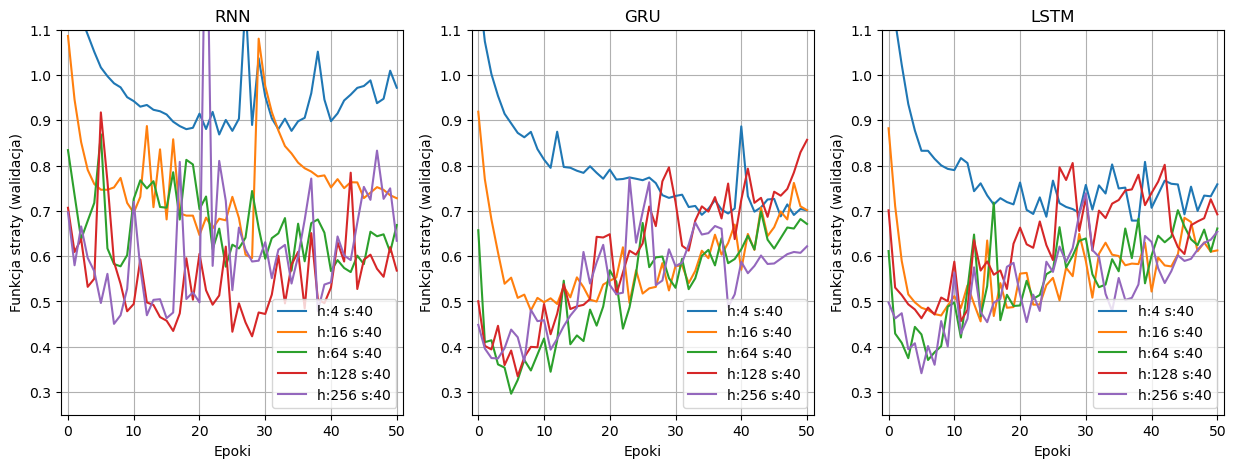

In [18]:
import json 
import matplotlib.pyplot as plt

hidden_units_l = [4, 16, 64, 128, 256]
sample_size_l = [40]

model_type_l = ["RNN", "GRU", "LSTM"]
colors = [f'C{id}' for id in range(40) ] 

plt.figure(figsize=(12, 8))
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ind_a, ax in enumerate(axes):
    for ind_h, hidden_units in enumerate(hidden_units_l):
        for ind_s, sample_size in enumerate(sample_size_l):
            path=f"data/small_dataset/data_3D/train_history/model_type_{model_type_l[ind_a]} hidden_units_{hidden_units} sample_size_{sample_size}.json"
            with open(path, 'r') as f:
                history = json.load(f)
            ax.plot(history['val_loss'][:51], label=f"h:{hidden_units} s:{sample_size}", color=colors[ind_h], linestyle="-")
            ax.set_xlabel('Epoki')
            ax.set_ylabel("Funkcja straty (walidacja)")
            ax.legend()
            ax.set_title(model_type_l[ind_a])
        ax.legend(loc='lower right')
        # ax.set_xlim(-5,105)
        # ax.set_ylim(0.25,1.1)
        ax.set_xlim(-1,51)
        ax.set_ylim(0.25,1.1)
    ax.grid()

plt.savefig("3D_plots/Validation Loss hidden_units.png")

plt.show()

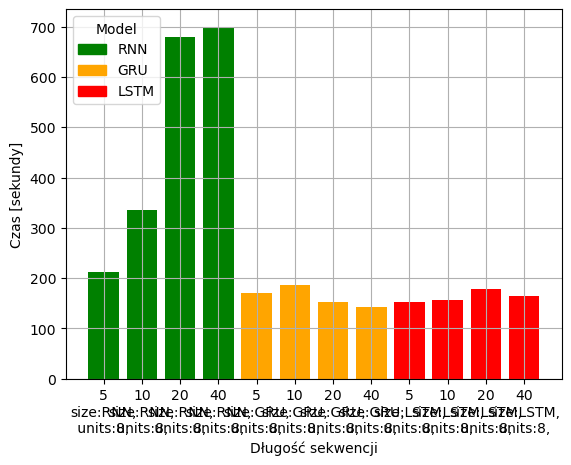

In [150]:
# histagram czasu uczenia modeli
import matplotlib.patches as mpatches

import json 
hidden_units_l = [8]
sample_size_l = [5, 10, 20, 40]
model_type_l = ["RNN", "GRU", "LSTM"]
colors = [f'C{id}' for id in range(24) ] 

categories =[]
values=[]

for ind_a, model_type in enumerate(model_type_l):
    for ind_h, hidden_units in enumerate(hidden_units_l):
        for ind_s, sample_size in enumerate(sample_size_l):
            path=f"data/small_dataset/data_3D/train_history/model_type_{model_type_l[ind_a]} hidden_units_{hidden_units} sample_size_{sample_size}.json"
            with open(path, 'r') as f:
                history = json.load(f)
            values.append(history['training_time'])
            categories.append(f"{sample_size}\nsize:{model_type_l[ind_a]},\n units:{hidden_units}, ")

# plt.figure(figsize=(24, 16))
n=4
color=['green' for _ in range(n)]+['orange' for _ in range(n)]+['red' for _ in range(n)]
plt.bar(categories, values ,color = color)
# plt.xticks(fontsize=20)
legend_handles = [mpatches.Patch(color='green', label='RNN'),mpatches.Patch(color='orange', label='GRU'),mpatches.Patch(color='red', label='LSTM'),]
plt.legend(handles=legend_handles, loc='upper left', title='Model')
plt.xlabel("Długość sekwencji")
plt.ylabel("Czas [sekundy]")
plt.grid()
# plt.savefig("3D_plots/image_1.png")
plt.show()

In [5]:
# tabela dla wszystkich danych - accuracy
import json
import pandas as pd
hidden_units_l = [4, 8, 16, 32, 64, 128, 256]
sample_size_l = [1, 3, 5, 10, 15, 20, 40]
model_type_l = ["RNN", "GRU", "LSTM"]
for ind_t, model_type in enumerate(model_type_l):
    for statistic in ['loss', 'accuracy', 'val_loss', 'val_accuracy', 'training_time', 'output_time']:
    # for statistic in ['loss', 'accuracy', 'val_loss', 'val_accuracy', 'training_time']:
        table={}
        for ind_h, hidden_units in enumerate(hidden_units_l):
            table[hidden_units]={}
            for ind_s, sample_size in enumerate(sample_size_l):
                table[hidden_units][sample_size]={}
                path=f"data/small_dataset/data_3D/train_history/model_type_{model_type_l[ind_t]} hidden_units_{hidden_units} sample_size_{sample_size}.json"
                with open(path, 'r') as f:
                    history = json.load(f)
                    if statistic=="training_time":
                        table[hidden_units][sample_size]=round(history[statistic],1)
                    elif statistic=="output_time":
                        table[hidden_units][sample_size]=round(history[statistic],3)
                    elif statistic in ['loss', 'val_loss']:
                        table[hidden_units][sample_size]=round(min(history[statistic]),3)
                    else:
                        table[hidden_units][sample_size]=round(max(history[statistic]),3)

        print(model_type,statistic)
        data=pd.DataFrame(table)
        display(data)

RNN loss


,4,8,16,32,64,128,256
1,0.782,0.649,0.530,0.419,0.331,0.287,0.261
3,0.713,0.518,0.326,0.151,0.037,0.007,0.005
5,0.663,0.458,0.248,0.083,0.013,0.001,0.000
10,0.646,0.443,0.148,0.033,0.004,0.000,0.000
15,0.617,0.398,0.132,0.043,0.014,0.001,0.000
20,0.592,0.351,0.134,0.058,0.013,0.001,0.004
40,0.546,0.337,0.206,0.072,0.027,0.020,0.044


RNN accuracy


,4,8,16,32,64,128,256
1,0.670,0.735,0.792,0.840,0.879,0.895,0.904
3,0.707,0.797,0.880,0.947,0.993,1.000,0.999
5,0.739,0.826,0.916,0.974,0.999,1.000,1.000
10,0.755,0.840,0.953,0.991,1.000,1.000,1.000
15,0.752,0.864,0.958,0.987,0.998,1.000,1.000
20,0.759,0.879,0.957,0.982,0.998,1.000,1.000
40,0.808,0.883,0.931,0.978,0.993,0.994,0.986


RNN val_loss


,4,8,16,32,64,128,256
1,0.871,0.810,0.753,0.725,0.718,0.717,0.730
3,0.838,0.771,0.716,0.633,0.619,0.597,0.603
5,0.806,0.738,0.697,0.617,0.620,0.560,0.563
10,0.817,0.813,0.657,0.550,0.612,0.515,0.513
15,0.850,0.882,0.600,0.498,0.574,0.469,0.463
20,0.864,0.858,0.559,0.531,0.486,0.476,0.451
40,0.869,0.895,0.596,0.520,0.565,0.423,0.451


RNN val_accuracy


,4,8,16,32,64,128,256
1,0.646,0.684,0.714,0.740,0.755,0.762,0.760
3,0.666,0.705,0.753,0.790,0.790,0.801,0.802
5,0.691,0.734,0.775,0.795,0.801,0.822,0.830
10,0.692,0.715,0.791,0.835,0.836,0.858,0.865
15,0.686,0.715,0.818,0.846,0.859,0.871,0.875
20,0.672,0.726,0.838,0.852,0.877,0.886,0.887
40,0.681,0.730,0.801,0.867,0.864,0.889,0.866


RNN training_time


,4,8,16,32,64,128,256
1,125.9,148.5,165.0,169.2,149.8,175.7,131.9
3,183.2,165.8,237.6,205.9,212.9,183.0,197.9
5,234.0,211.8,282.2,240.0,317.5,230.8,247.0
10,445.9,335.6,384.7,384.7,482.5,328.9,357.9
15,476.0,427.8,444.1,506.4,532.7,456.4,454.3
20,528.5,678.7,518.8,627.7,535.8,559.4,566.5
40,610.0,699.4,605.2,631.6,675.4,593.5,722.9


RNN output_time


,4,8,16,32,64,128,256
1,0.059,0.085,0.079,0.062,0.064,0.096,0.065
3,0.053,0.053,0.069,0.067,0.092,0.068,0.065
5,0.074,0.059,0.430,0.144,0.103,0.068,0.067
10,0.083,0.065,0.064,0.067,0.540,0.092,0.064
15,0.074,0.060,0.065,0.084,0.124,0.067,0.384
20,0.066,0.115,0.066,0.078,0.071,0.078,0.065
40,0.165,0.090,0.102,0.131,0.149,0.084,0.080


GRU loss


,4,8,16,32,64,128,256
1,0.619,0.487,0.380,0.311,0.252,0.218,0.197
3,0.489,0.304,0.138,0.051,0.014,0.007,0.001
5,0.368,0.202,0.065,0.011,0.002,0.000,0.000
10,0.272,0.095,0.018,0.003,0.000,0.000,0.000
15,0.282,0.085,0.014,0.001,0.000,0.000,0.000
20,0.278,0.064,0.016,0.002,0.000,0.000,0.000
40,0.263,0.068,0.016,0.002,0.001,0.000,0.000


GRU accuracy


,4,8,16,32,64,128,256
1,0.750,0.813,0.857,0.886,0.908,0.920,0.929
3,0.817,0.892,0.956,0.986,0.997,0.999,1.000
5,0.876,0.933,0.981,0.999,1.000,1.000,1.000
10,0.912,0.968,0.998,1.000,1.000,1.000,1.000
15,0.909,0.973,0.999,1.000,1.000,1.000,1.000
20,0.901,0.979,0.997,1.000,1.000,1.000,1.000
40,0.904,0.978,0.998,1.000,1.000,1.000,1.000


GRU val_loss


,4,8,16,32,64,128,256
1,0.784,0.740,0.662,0.665,0.657,0.678,0.686
3,0.771,0.687,0.588,0.576,0.568,0.584,0.579
5,0.724,0.640,0.545,0.535,0.541,0.551,0.516
10,0.631,0.569,0.444,0.429,0.413,0.449,0.412
15,0.673,0.514,0.430,0.381,0.384,0.391,0.394
20,0.671,0.427,0.430,0.362,0.365,0.387,0.362
40,0.688,0.470,0.480,0.304,0.296,0.335,0.367


GRU val_accuracy


,4,8,16,32,64,128,256
1,0.689,0.723,0.760,0.769,0.776,0.776,0.778
3,0.733,0.761,0.804,0.810,0.818,0.821,0.825
5,0.758,0.790,0.816,0.822,0.835,0.841,0.844
10,0.800,0.810,0.852,0.867,0.882,0.879,0.886
15,0.783,0.838,0.856,0.881,0.887,0.886,0.900
20,0.787,0.863,0.858,0.881,0.880,0.901,0.899
40,0.770,0.849,0.853,0.900,0.897,0.893,0.907


GRU training_time


,4,8,16,32,64,128,256
1,149.0,143.0,128.1,120.2,128.0,143.3,139.1
3,154.9,155.1,128.0,123.7,135.0,143.8,148.8
5,174.1,170.3,129.7,129.2,137.1,143.9,146.3
10,190.0,186.7,143.4,143.4,153.4,153.0,152.2
15,207.2,177.5,149.3,142.1,152.9,154.5,162.4
20,212.1,152.6,153.2,144.2,156.4,163.7,172.8
40,227.5,143.0,139.8,138.9,145.4,150.5,188.8


GRU output_time


,4,8,16,32,64,128,256
1,0.075,0.073,0.075,0.080,0.071,0.078,0.080
3,0.084,0.075,0.083,0.070,0.076,0.080,0.078
5,0.074,0.074,0.082,0.076,0.075,0.079,0.079
10,0.082,0.073,0.076,0.077,0.084,0.078,0.080
15,0.083,0.077,0.090,0.076,0.071,0.077,0.080
20,0.080,0.076,0.076,0.075,0.129,0.113,0.082
40,0.081,0.077,0.083,0.071,0.078,0.089,0.077


LSTM loss


,4,8,16,32,64,128,256
1,0.679,0.509,0.381,0.297,0.231,0.192,0.167
3,0.473,0.283,0.141,0.053,0.019,0.014,0.003
5,0.355,0.161,0.065,0.017,0.006,0.003,0.000
10,0.260,0.066,0.018,0.003,0.001,0.000,0.000
15,0.231,0.052,0.018,0.002,0.000,0.000,0.000
20,0.178,0.040,0.014,0.002,0.001,0.000,0.000
40,0.140,0.055,0.012,0.003,0.001,0.000,0.000


LSTM accuracy


,4,8,16,32,64,128,256
1,0.697,0.805,0.856,0.893,0.921,0.933,0.941
3,0.820,0.897,0.951,0.985,0.996,0.997,0.999
5,0.870,0.943,0.981,0.996,0.999,1.000,1.000
10,0.916,0.981,0.997,1.000,1.000,1.000,1.000
15,0.929,0.984,0.997,1.000,1.000,1.000,1.000
20,0.945,0.988,0.998,1.000,1.000,1.000,1.000
40,0.958,0.983,0.998,1.000,1.000,1.000,1.000


LSTM val_loss


,4,8,16,32,64,128,256
1,0.843,0.719,0.652,0.646,0.635,0.639,0.654
3,0.750,0.681,0.616,0.579,0.552,0.571,0.583
5,0.701,0.601,0.539,0.531,0.500,0.495,0.517
10,0.631,0.487,0.463,0.442,0.399,0.415,0.429
15,0.591,0.507,0.407,0.435,0.385,0.380,0.387
20,0.554,0.430,0.371,0.450,0.391,0.446,0.407
40,0.679,0.547,0.456,0.445,0.371,0.457,0.342


LSTM val_accuracy


,4,8,16,32,64,128,256
1,0.642,0.719,0.751,0.766,0.776,0.783,0.784
3,0.717,0.765,0.800,0.806,0.817,0.821,0.824
5,0.757,0.807,0.822,0.820,0.845,0.843,0.846
10,0.795,0.837,0.861,0.860,0.877,0.872,0.881
15,0.821,0.852,0.876,0.870,0.878,0.882,0.897
20,0.835,0.866,0.887,0.879,0.892,0.891,0.891
40,0.803,0.862,0.858,0.869,0.883,0.886,0.895


LSTM training_time


,4,8,16,32,64,128,256
1,142.6,139.5,143.2,151.0,159.3,168.8,173.0
3,145.2,144.5,152.8,156.8,170.1,174.3,179.2
5,151.6,151.8,156.2,166.9,170.4,176.7,186.0
10,161.0,155.9,166.3,179.0,181.1,193.1,190.0
15,168.9,169.4,165.1,171.5,180.6,206.2,204.9
20,167.3,178.5,179.5,179.5,182.0,203.8,213.8
40,166.5,164.4,164.1,165.3,177.6,227.1,225.5


LSTM output_time


,4,8,16,32,64,128,256
1,0.083,0.084,0.093,0.081,0.075,0.081,0.084
3,0.077,0.082,0.074,0.081,0.078,0.081,0.085
5,0.080,0.082,0.094,0.093,0.084,0.082,0.085
10,0.082,0.082,0.095,0.080,0.082,0.090,0.089
15,0.081,0.079,0.085,0.084,0.089,0.076,0.083
20,0.091,0.106,0.136,0.154,0.124,0.491,0.091
40,0.077,0.088,0.079,0.081,0.082,0.076,0.084


# Finalne uczenie modelu

In [3]:
import json
path="data/small_dataset/data_3D/train_history/model_type_GRU hidden_units_64 sample_size_40.json"
with open(path, "r") as file:
    data = json.load(file)
l=data['val_loss']
max_val=max(l)
print(l.index(max_val))
print(l)
print(l[l.index(max_val)])

93
[0.6573368906974792, 0.41017574071884155, 0.4143969714641571, 0.3610745370388031, 0.35403522849082947, 0.29632917046546936, 0.32671990990638733, 0.3709687888622284, 0.34767284989356995, 0.3828867971897125, 0.4183066487312317, 0.34483638405799866, 0.4143466651439667, 0.5459004044532776, 0.4055810868740082, 0.4250464141368866, 0.4126328229904175, 0.48213663697242737, 0.4466480314731598, 0.4887780547142029, 0.5689322352409363, 0.5436035990715027, 0.439975380897522, 0.48700734972953796, 0.5614801645278931, 0.6733683347702026, 0.5757399797439575, 0.5974186658859253, 0.5991845726966858, 0.5515623688697815, 0.5302026271820068, 0.594447910785675, 0.5272070169448853, 0.551188588142395, 0.6008725762367249, 0.6139445900917053, 0.5796874761581421, 0.6395426392555237, 0.584589958190918, 0.5937356352806091, 0.615312397480011, 0.6452370882034302, 0.6148936748504639, 0.6988032460212708, 0.6363900899887085, 0.6168096661567688, 0.6400769352912903, 0.663314700126648, 0.6610588431358337, 0.681975245475

In [4]:
X_train_data_0=pd.read_csv("data/big_dataset/data_3D/train/train_2.csv").drop(columns=["Unnamed: 0"])
X_train_data_0=np.array(X_train_data_0)[2500:12959]#[2500:5000]

X_train_data_1=pd.read_csv("data/big_dataset/data_3D/train/train_1.csv").drop(columns=["Unnamed: 0"])
X_train_data_1=np.array(X_train_data_1)[2500:]#[2500:5000]

X_train_data=np.concatenate((X_train_data_0, X_train_data_1), axis=0, out=None, dtype=None)

X_test_data_0=pd.read_csv("data/big_dataset/data_3D/train/train_2.csv").drop(columns=["Unnamed: 0"])
X_test_data_0=np.array(X_test_data_0)[:2500]

X_test_data_1=pd.read_csv("data/big_dataset/data_3D/train/train_1.csv").drop(columns=["Unnamed: 0"])
X_test_data_1=np.array(X_test_data_1)[:2500]

X_test_data=np.concatenate((X_test_data_0, X_test_data_1), axis=0, out=None, dtype=None)

In [5]:
#train
file_path = "data/big_dataset/data_3D/train/Main_2/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_train_data_0=[None for e in range(X_train_data_0.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[2500:12959]): #[2500:5000]

        if example[-2:]==" 1":
            Y_train_data_0[id]=categories.index(cat)

file_path = "data/big_dataset/data_3D/train/Main_1/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_train_data_1=[None for e in range(X_train_data_1.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[2500:]): #[2500:5000]
        if example[-2:]==" 1":
            Y_train_data_1[id]=categories.index(cat)
Y_train_data=np.concatenate((Y_train_data_0, Y_train_data_1), axis=0, out=None, dtype=None)

#test
file_path = "data/big_dataset/data_3D/train/Main_2/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_test_data_0=[None for e in range(X_test_data_0.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[:2500]):
        if example[-2:]==" 1":
            Y_test_data_0[id]=categories.index(cat)

file_path = "data/big_dataset/data_3D/train/Main_1/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_test_data_1=[None for e in range(X_test_data_1.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[:2500]):
        if example[-2:]==" 1":
            Y_test_data_1[id]=categories.index(cat)
Y_test_data=np.concatenate((Y_test_data_0, Y_test_data_1), axis=0, out=None, dtype=None)

In [6]:
None in Y_train_data
none_indices = np.where(Y_train_data == None)[0]  # Używamy == None

print("Indeksy wartości None:", none_indices)
print(len(Y_train_data))

Indeksy wartości None: []
20709


In [57]:
print(len(Y_test_data))

5000


In [49]:
hidden_units_l = [64]
sample_size_l = [40]
model_type_l = ["GRU"]
for model_type in model_type_l:
    for hidden_units in hidden_units_l:
        for sample_size in sample_size_l:
            history, training_time, output_time, model, scaler=train_model(X_train_data, Y_train_data, X_test_data, Y_test_data, model_type, 5, sample_size, hidden_units, 42)

Epoch 1/5
646/646 [==============================] - 6s 7ms/step - loss: 0.5673 - accuracy: 0.7758 - val_loss: 0.3594 - val_accuracy: 0.8815
Epoch 2/5
646/646 [==============================] - 4s 6ms/step - loss: 0.2005 - accuracy: 0.9316 - val_loss: 0.3049 - val_accuracy: 0.9077
Epoch 3/5
646/646 [==============================] - 4s 7ms/step - loss: 0.1548 - accuracy: 0.9466 - val_loss: 0.2683 - val_accuracy: 0.9153
Epoch 4/5
646/646 [==============================] - 4s 6ms/step - loss: 0.1364 - accuracy: 0.9518 - val_loss: 0.2263 - val_accuracy: 0.9206
Epoch 5/5
1/1 [==============================] - 0s 20ms/step


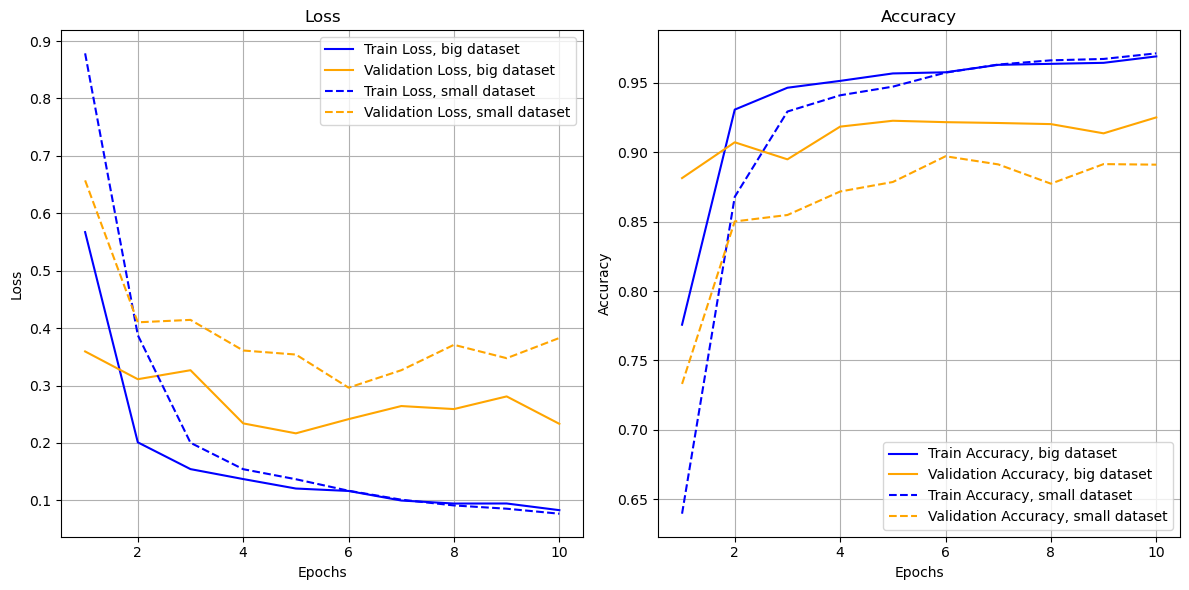

{'loss': [0.8785794973373413,
  0.38782989978790283,
  0.20036311447620392,
  0.15435688197612762,
  0.1368853896856308,
  0.11684730648994446,
  0.10127058625221252,
  0.09123720973730087,
  0.08554824441671371,
  0.07684799283742905,
  0.06926029175519943,
  0.06732101738452911,
  0.06180303543806076,
  0.05764921382069588,
  0.05375030264258385,
  0.0524357333779335,
  0.053503017872571945,
  0.048199933022260666,
  0.03965909406542778,
  0.03873024135828018,
  0.038844380527734756,
  0.03790175914764404,
  0.03562343865633011,
  0.03044198267161846,
  0.03221148997545242,
  0.03222980350255966,
  0.03166941925883293,
  0.027631014585494995,
  0.025692414492368698,
  0.023598840460181236,
  0.023645099252462387,
  0.021955154836177826,
  0.0326400063931942,
  0.02288747951388359,
  0.015705237165093422,
  0.017190707847476006,
  0.017509235069155693,
  0.025184689089655876,
  0.029719244688749313,
  0.02081025391817093,
  0.011435921303927898,
  0.009068524464964867,
  0.02207463234

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history.get('val_loss', [])  # Nie zawsze jest walidacja
train_accuracy = history.history.get('accuracy', [])
val_accuracy = history.history.get('val_accuracy', [])
epochs = range(1, len(train_loss) + 1)  # Liczba epok

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss, big dataset', linestyle='-', color="blue")
plt.plot(epochs, val_loss, label='Validation Loss, big dataset', linestyle='-', color="orange")

plt.plot(epochs, data['loss'][:10], label='Train Loss, small dataset', linestyle='--',  color="blue")
plt.plot(epochs, data['val_loss'][:10], label='Validation Loss, small dataset', linestyle='--', color="orange")

plt.grid()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Train Accuracy, big dataset', linestyle='-', color="blue")
plt.plot(epochs, val_accuracy, label='Validation Accuracy, big dataset', linestyle='-', color="orange")

plt.plot(epochs, data['accuracy'][:10], label='Train Accuracy, small dataset', linestyle='--',  color="blue")
plt.plot(epochs, data['val_accuracy'][:10], label='Validation Accuracy, small dataset', linestyle='--', color="orange")

plt.grid()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("3D_plots/final_model.png")
plt.tight_layout()
plt.show()


In [50]:
import numpy as np

X_test = scaler.transform(X_test_data)
X_test, Y_test= np.array([X_test[i:i+sample_size] for i in range(X_test.shape[0]-sample_size)]), np.array(Y_test_data[sample_size:])
predictions = model.predict(np.array(X_test))
predicted_classes = np.argmax(predictions, axis=1)

155/155 [==============================] - 1s 3ms/step


In [51]:
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
for ind, cat in enumerate(predicted_classes):
    print("Wynik modelu:       ", categories[cat])
    print("Prawdziwa kategoria:", categories[Y_test[ind]])
    print()
    if ind >10:
        break

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: sięganie po karton

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: sięganie po karton

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: sięganie po karton

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: sięganie po karton

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: rozpakowywanie

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: rozpakowywanie

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: rozpakowywanie

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: rozpakowywanie

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: rozpakowywanie

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: rozpakowywanie

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: rozpakowywanie

Wynik modelu:        rozpakowywanie
Prawdziwa kategoria: rozpakowywanie



Macierz konfuzji:


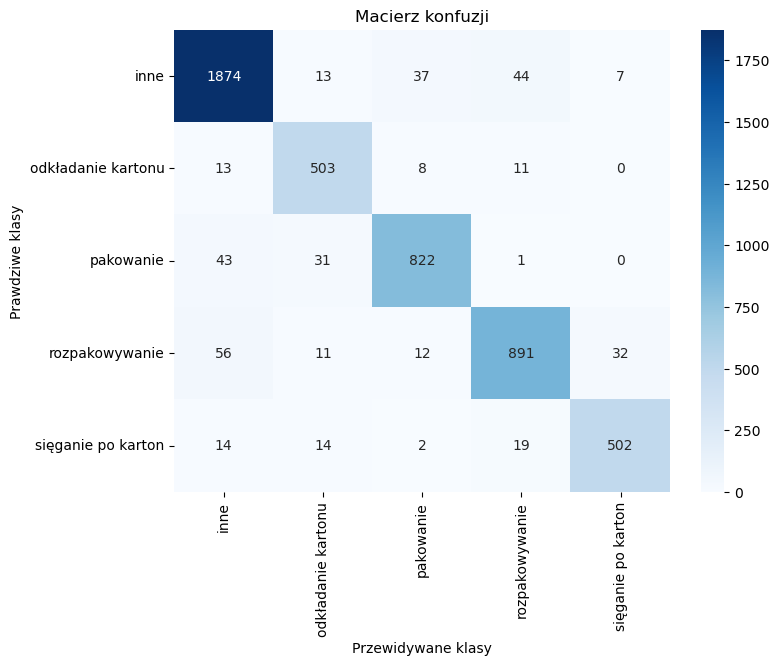


Precyzja, czułość i F1-score:
              precision    recall  f1-score   support

           0     0.9370    0.9489    0.9429      1975
           1     0.8794    0.9402    0.9088       535
           2     0.9330    0.9164    0.9246       897
           3     0.9224    0.8892    0.9055      1002
           4     0.9279    0.9111    0.9194       551

    accuracy                         0.9258      4960
   macro avg     0.9199    0.9211    0.9202      4960
weighted avg     0.9261    0.9258    0.9257      4960



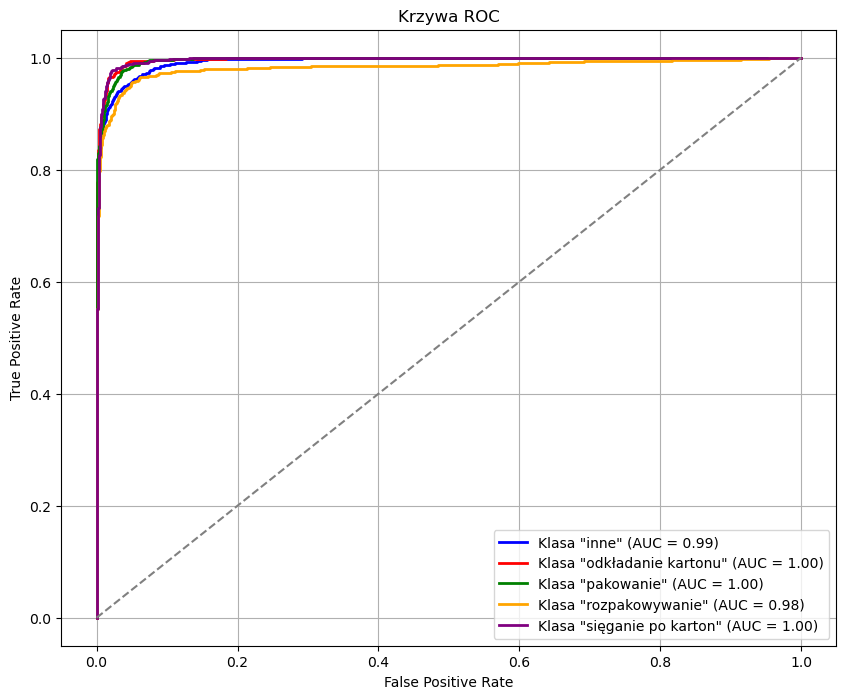

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

conf_matrix = confusion_matrix(Y_test, predicted_classes)
print("Macierz konfuzji:")
categories = ["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.title('Macierz konfuzji')
plt.xlabel('Przewidywane klasy')
plt.ylabel('Prawdziwe klasy')
plt.savefig("3D_plots/macierz_konfuzji.png", bbox_inches='tight')
plt.show()

class_report = classification_report(Y_test, predicted_classes, digits=4)
print("\nPrecyzja, czułość i F1-score:")
print(class_report)

n_classes = len(np.unique(Y_test))
Y_test_binarized = label_binarize(Y_test, classes=np.arange(n_classes))
predictions_binarized = label_binarize(predicted_classes, classes=np.arange(n_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_binarized.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Klasa "{categories[i]}" (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.grid()
plt.savefig("3D_plots/ROC.png", bbox_inches='tight')
plt.show()
#["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]

In [32]:
h5_file_path = "GRU_40_64_20_aplikacja_model.h5"
model.save(h5_file_path)

In [ ]:
X_test_prepared = scaler.transform(X_test)
X_test_prepared = np.array([X_test_prepared[i:i+sample_size] for i in range(X_test_prepared.shape[0]-sample_size)])
predictions = model.predict(X_test_prepared)
predicted_classes = np.argmax(predictions, axis=1)

# Wyświetlenie wyników
for i, pred in enumerate(predicted_classes[:10]):  # Pierwsze 10 przykładów
    print(f"Przykład {i + 1}: Przewidziana klasa = {pred}, Prawdziwa klasa = {Y_test[i + sample_size]}")


In [36]:
scaler.scale_

array([ 2.49446126,  0.35554637,  0.59303074,  1.0385519 ,  0.28357831,
        0.30178513,  0.90482986,  0.28215475,  0.2779665 ,  1.61682663,
        0.40081268,  0.42749397,  1.21664909,  0.31294344,  0.35804453,
        0.89330182,  0.26190105,  0.28300911,  1.0822468 ,  0.27157724,
        0.32185278, 13.6805443 ,  2.42257751,  3.22244742,  1.07000676,
        0.26271298,  0.30618204,  1.35416284,  0.29591056,  0.35182584,
        3.71081797,  0.53280135,  0.72044774,  7.77245033,  1.22413307,
        1.78434738,  5.04779756,  0.45631245,  0.9763854 ,  5.20252256,
        0.35008625,  1.40058953,  1.98317605,  0.69613097,  0.27613606,
       11.56912296,  0.47235022,  3.10689712,  8.96189377,  1.27617224,
        1.35963383, 27.58869349,  1.42479599,  2.08755953, 18.8344391 ,
        3.51584743,  2.42753988, 19.09473477,  2.98864323,  2.62769185,
        7.68021544,  1.1766933 ,  1.90516793,  4.01621961,  0.42532167,
        1.04799875, 28.54306975,  4.15884143,  2.04241436,  4.12

In [35]:
scaler.mean_

array([ 1.14395238,  0.2466488 ,  0.80307759,  1.17645265,  0.24936065,
        0.81508349,  1.17021584,  0.25323272,  0.81761499,  1.17745531,
        0.25365913,  0.81739895,  1.16158421,  0.2443256 ,  0.82011149,
        1.16919513,  0.2407582 ,  0.81986432,  1.17137881,  0.23815458,
        0.82130121,  1.26286529,  0.23972148,  0.80182755,  1.1688231 ,
        0.23365641,  0.8268288 ,  1.14368029,  0.24871904,  0.78750589,
        1.12483445,  0.24133512,  0.79112845,  1.0918459 ,  0.28051633,
        0.74262816,  1.07405479,  0.2037395 ,  0.74874443,  0.98151313,
        0.29753138,  0.59985475,  0.92887634,  0.19265528,  0.60332539,
        0.99457562,  0.28395517,  0.44806567,  0.89185705,  0.20128074,
        0.45390455,  1.03033808,  0.30444786,  0.42687283,  1.08168934,
        0.17546043,  0.4026003 ,  0.77272567,  0.30677558,  0.4518919 ,
        0.88879939,  0.19935378,  0.42488769,  0.86610813,  0.27760691,
        0.4551112 ,  0.9580882 ,  0.17752869,  0.43990206,  0.91

# Uczenie FNN

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import time

def train_FNN(X_train_data, Y_train_data, X_test_data, Y_test_data, epochs, sample_size, hidden_units, seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    scaler = StandardScaler()
    X_train_data = scaler.fit_transform(X_train_data)
    X_test_data = scaler.transform(X_test_data)
    
    X_train = np.array([X_train_data[i:i+sample_size] for i in range(len(X_train_data) - sample_size)])
    Y_train = np.array(Y_train_data[sample_size:])
    
    X_test = np.array([X_test_data[i:i+sample_size] for i in range(len(X_test_data) - sample_size)])
    Y_test = np.array(Y_test_data[sample_size:])
    
    X_train = X_train.reshape(X_train.shape[0], -1)  # (n_samples, sample_size * n_features)
    X_test = X_test.reshape(X_test.shape[0], -1)    # (n_samples, sample_size * n_features)
    # print(len(X_train[0]))
    print(X_train.shape)
    model = Sequential([
        Dense(units=hidden_units, input_shape=(X_train.shape[1],), activation='tanh'),  # Specify units (e.g., 64)
        Dense(units=5, activation='softmax')  # Specify units (e.g., 5)
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    training_time = time.time()
    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=32)
    training_time = time.time() - training_time

    output_time = time.time()
    example_n = 10
    for example in range(example_n):
        model.predict(X_test[example].reshape(1, -1))
    output_time = (time.time() - output_time) / example_n
    return history, training_time, output_time, model

In [3]:
X_train_data_0=pd.read_csv("data/big_dataset/data_3D/train/train_2.csv").drop(columns=["Unnamed: 0"])
X_train_data_0=np.array(X_train_data_0)[2500:5000]#[2500:5000]

X_train_data_1=pd.read_csv("data/big_dataset/data_3D/train/train_1.csv").drop(columns=["Unnamed: 0"])
X_train_data_1=np.array(X_train_data_1)[2500:5000]#[2500:5000]

X_train_data=np.concatenate((X_train_data_0, X_train_data_1), axis=0, out=None, dtype=None)

X_test_data_0=pd.read_csv("data/big_dataset/data_3D/train/train_2.csv").drop(columns=["Unnamed: 0"])
X_test_data_0=np.array(X_test_data_0)[:2500]

X_test_data_1=pd.read_csv("data/big_dataset/data_3D/train/train_1.csv").drop(columns=["Unnamed: 0"])
X_test_data_1=np.array(X_test_data_1)[:2500]

X_test_data=np.concatenate((X_test_data_0, X_test_data_1), axis=0, out=None, dtype=None)

In [4]:
#train
file_path = "data/big_dataset/data_3D/train/Main_2/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_train_data_0=[None for e in range(X_train_data_0.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[2500:5000]): #[2500:5000]

        if example[-2:]==" 1":
            Y_train_data_0[id]=categories.index(cat)

file_path = "data/big_dataset/data_3D/train/Main_1/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_train_data_1=[None for e in range(X_train_data_1.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[2500:5000]): #[2500:5000]
        if example[-2:]==" 1":
            Y_train_data_1[id]=categories.index(cat)
Y_train_data=np.concatenate((Y_train_data_0, Y_train_data_1), axis=0, out=None, dtype=None)

#test
file_path = "data/big_dataset/data_3D/train/Main_2/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_test_data_0=[None for e in range(X_test_data_0.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[:2500]):
        if example[-2:]==" 1":
            Y_test_data_0[id]=categories.index(cat)

file_path = "data/big_dataset/data_3D/train/Main_1/"
categories=["inne", "odkładanie kartonu", "pakowanie", "rozpakowywanie", "sięganie po karton"]
Y_test_data_1=[None for e in range(X_test_data_1.shape[0])]
for cat in categories:
    with open(file_path+cat+".txt", "r", encoding="utf-8") as file:
        content = file.read() 
    for id, example in enumerate(content.split("\n")[:2500]):
        if example[-2:]==" 1":
            Y_test_data_1[id]=categories.index(cat)
Y_test_data=np.concatenate((Y_test_data_0, Y_test_data_1), axis=0, out=None, dtype=None)


In [5]:
import json
hidden_units_l = [4, 16, 64, 128, 256]
sample_size_l = [40]
seed=42
epochs=100
for hidden_units in hidden_units_l:
    for sample_size in sample_size_l:
        history, training_time, output_time, model= train_FNN(X_train_data, Y_train_data, X_test_data, Y_test_data, epochs, sample_size, hidden_units, seed)
        path=f"data/small_dataset/data_3D/train_history/model_type_FNN hidden_units_{hidden_units} sample_size_{sample_size}"
        history.history["training_time"]=training_time
        history.history["output_time"]=output_time
        with open(path+".json", 'w') as f:
            json.dump(history.history, f)
        model.save(path+".h5")

(4960, 3960)
Epoch 1/100
155/155 [==============================] - 3s 7ms/step - loss: 1.2525 - accuracy: 0.5256 - val_loss: 1.1826 - val_accuracy: 0.5482
Epoch 2/100
155/155 [==============================] - 1s 5ms/step - loss: 1.0190 - accuracy: 0.6365 - val_loss: 1.0797 - val_accuracy: 0.5879
Epoch 3/100
155/155 [==============================] - 1s 5ms/step - loss: 0.8820 - accuracy: 0.6954 - val_loss: 1.0186 - val_accuracy: 0.5990
Epoch 4/100
155/155 [==============================] - 1s 6ms/step - loss: 0.7729 - accuracy: 0.7357 - val_loss: 1.0010 - val_accuracy: 0.6085
Epoch 5/100
155/155 [==============================] - 1s 5ms/step - loss: 0.6903 - accuracy: 0.7776 - val_loss: 0.9767 - val_accuracy: 0.6204
Epoch 6/100
155/155 [==============================] - 1s 5ms/step - loss: 0.6068 - accuracy: 0.8127 - val_loss: 0.9713 - val_accuracy: 0.6228
Epoch 7/100
155/155 [==============================] - 1s 5ms/step - loss: 0.5511 - accuracy: 0.8288 - val_loss: 0.9854 - val_acc

In [ ]:


for ind_a, ax in enumerate(axes):
    for ind_h, hidden_units in enumerate(hidden_units_l):
        for ind_s, sample_size in enumerate(sample_size_l):
            path=f"data/small_dataset/data_3D/train_history/model_type_{model_type_l[ind_a]} hidden_units_{hidden_units} sample_size_{sample_size}.json"
            with open(path, 'r') as f:
                history = json.load(f)
            ax.plot(history[type[acc]][:51], label=f"h:{hidden_units} s:{sample_size}", color=colors[ind_h], linestyle="-")
            ax.set_xlabel('Epoki')
            ax.set_ylabel('Dokładność (walidacja)')
            ax.legend()
            ax.set_title(model_type_l[ind_a])
        ax.legend(loc='lower right')
        ax.grid()
        # ax.set_xlim(-5,105)
        # ax.set_ylim(0.4,1.05)
        ax.set_xlim(-1,51)
        ax.set_ylim(0.53,0.92)

plt.savefig("3D_plots/Validation Accuracy hidden_units.png")
plt.show()

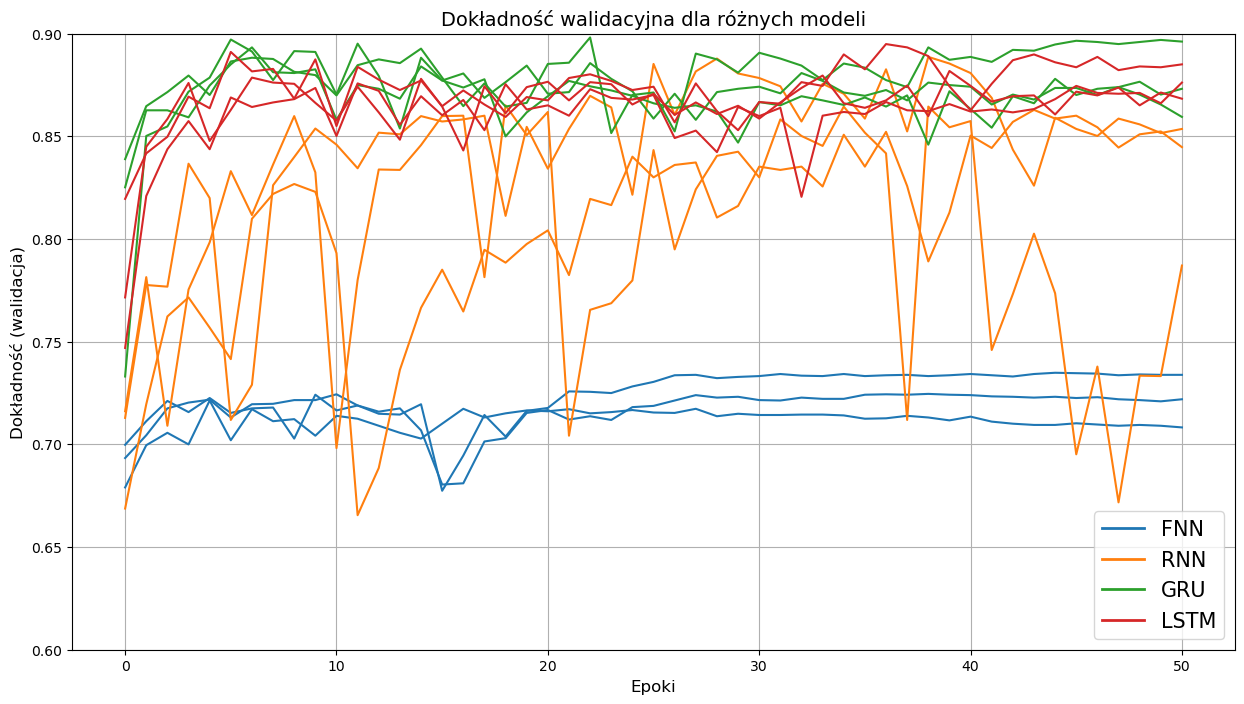

In [48]:
import json
import matplotlib.pyplot as plt

# Parametry
hidden_units_l =  [64, 128, 256]
sample_size_l = [40]
model_type_l = ["FNN", "RNN", "GRU", "LSTM"]
colors = [f'C{id}' for id in range(40)]

# Tworzenie głównej figury
plt.figure(figsize=(15, 8))

for ind_m, model_type in enumerate(model_type_l):  
    for ind_h, hidden_units in enumerate(hidden_units_l):
        for ind_s, sample_size in enumerate(sample_size_l):
            try:
                # Konstruowanie ścieżki
                path=f"data/small_dataset/data_3D/train_history/model_type_{model_type_l[ind_m]} hidden_units_{hidden_units} sample_size_{sample_size}.json"
                
                # Otwieranie pliku JSON
                with open(path, 'r') as f:
                    history = json.load(f)
                
                # Rysowanie wykresu dla każdego pliku
                plt.plot(
                    history['val_accuracy'][:51], 
                    label=f"{model_type} | h:{hidden_units} s:{sample_size}", 
                    color=colors[ind_m], 
                    linestyle="-"
                )
            except FileNotFoundError:
                print(f"File not found: {path}")
            except KeyError as e:
                print(f"Key error {e} in file: {path}")

# Ustawienia osi, legendy i tytułu
plt.xlabel('Epoki', fontsize=12)
plt.ylabel("Dokładność (walidacja)", fontsize=12)
plt.title("Dokładność walidacyjna dla różnych modeli", fontsize=14)

legend_lines = [
    plt.Line2D([0], [0], color=f'C{0}', lw=2, label='FNN'),
    plt.Line2D([0], [0], color=f'C{1}', lw=2, label='RNN'),
    plt.Line2D([0], [0], color=f'C{2}', lw=2, label='GRU'),
    plt.Line2D([0], [0], color=f'C{3}', lw=2, label='LSTM')
]
plt.legend(handles=legend_lines, fontsize=15, loc='lower right')
plt.grid(True)
plt.ylim((0.6,0.9))
plt.savefig("3D_plots/FNN_acc.png", bbox_inches='tight')
plt.show()

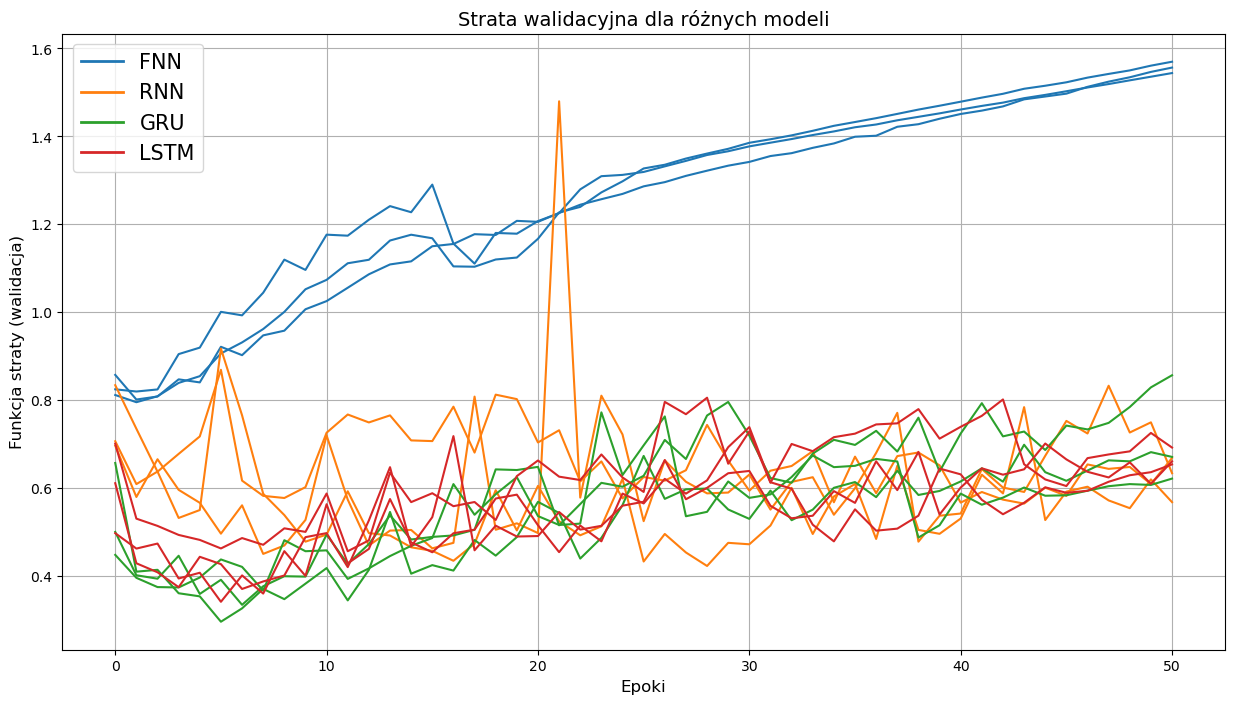

In [49]:
import json
import matplotlib.pyplot as plt

# Parametry
hidden_units_l =  [64, 128, 256]
sample_size_l = [40]
model_type_l = ["FNN", "RNN", "GRU", "LSTM"]
colors = [f'C{id}' for id in range(40)]

# Tworzenie głównej figury
plt.figure(figsize=(15, 8))

for ind_m, model_type in enumerate(model_type_l):  
    for ind_h, hidden_units in enumerate(hidden_units_l):
        for ind_s, sample_size in enumerate(sample_size_l):
            try:
                # Konstruowanie ścieżki
                path=f"data/small_dataset/data_3D/train_history/model_type_{model_type_l[ind_m]} hidden_units_{hidden_units} sample_size_{sample_size}.json"
                
                # Otwieranie pliku JSON
                with open(path, 'r') as f:
                    history = json.load(f)
                
                # Rysowanie wykresu dla każdego pliku
                plt.plot(
                    history['val_loss'][:51], 
                    label=f"{model_type} | h:{hidden_units} s:{sample_size}", 
                    color=colors[ind_m], 
                    linestyle="-"
                )
            except FileNotFoundError:
                print(f"File not found: {path}")
            except KeyError as e:
                print(f"Key error {e} in file: {path}")

# Ustawienia osi, legendy i tytułu
plt.xlabel('Epoki', fontsize=12)
plt.ylabel("Funkcja straty (walidacja)", fontsize=12)
plt.title("Strata walidacyjna dla różnych modeli", fontsize=14)

legend_lines = [
    plt.Line2D([0], [0], color=f'C{0}', lw=2, label='FNN'),
    plt.Line2D([0], [0], color=f'C{1}', lw=2, label='RNN'),
    plt.Line2D([0], [0], color=f'C{2}', lw=2, label='GRU'),
    plt.Line2D([0], [0], color=f'C{3}', lw=2, label='LSTM')
]
plt.legend(handles=legend_lines,fontsize=15, loc='best')
plt.grid(True)
plt.savefig("3D_plots/FNN_loss.png", bbox_inches='tight')
# plt.ylim((0.6,0.9))
plt.show()

In [108]:
def speed(X_train, X_test, seed, path):
    np.random.seed(seed)
    tf.random.set_seed(seed)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train= np.array([X_train[i:i+sample_size] for i in range(X_train.shape[0]-sample_size)])
    X_test= np.array([X_test[i:i+sample_size] for i in range(X_test.shape[0]-sample_size)])

    model = tf.keras.models.load_model(path)
    model.predict(X_test[0].reshape(1,sample_size, 99),verbose=False)
    time.sleep(0.1)
    output_time=time.time()
    example_n=100
    for example in range(example_n):
        model.predict(X_test[example].reshape(1,sample_size, 99),verbose=False)
    output_time=(time.time()-output_time)/example_n
    time.sleep(0.1)
    return output_time

In [109]:
import tensorflow as tf
import numpy as np
import time
from tqdm import tqdm
hidden_units_l = [4, 8, 16, 32, 64, 128, 256]
sample_size_l = [1, 3, 5, 10, 15, 20, 40] 
model_type_l = ["RNN", "GRU", "LSTM"]

# hidden_units_l = [4,8]
# sample_size_l = [40] 
# model_type_l = ["RNN"]

for model_type in model_type_l:
    table={}
    for hidden_units in tqdm(hidden_units_l):
        table[hidden_units]={}
        for sample_size in sample_size_l:

            path=f"data/small_dataset/data_3D/train_history/model_type_{model_type} hidden_units_{hidden_units} sample_size_{sample_size}.h5"
            output_time = speed(X_train=X_train_data, X_test=X_test_data, seed=42, path=path)         
            table[hidden_units][sample_size]=output_time
    print(model_type)
    print(pd.DataFrame(table))
  

100%|██████████| 7/7 [03:43<00:00, 31.96s/it]


RNN
         4         8         16        32        64        128       256
1   0.038393  0.037686  0.038202  0.038675  0.038146  0.038228  0.041898
3   0.041221  0.038092  0.040721  0.037902  0.040970  0.038467  0.042684
5   0.037860  0.038203  0.038479  0.038344  0.038575  0.038631  0.040397
10  0.039426  0.039149  0.039422  0.039131  0.039162  0.039796  0.040737
15  0.040313  0.039877  0.042326  0.040623  0.040192  0.040506  0.041011
20  0.040712  0.042697  0.043720  0.041954  0.041654  0.041609  0.042476
40  0.044401  0.045636  0.045135  0.045455  0.045227  0.045677  0.047850


100%|██████████| 7/7 [03:49<00:00, 32.80s/it]


GRU
         4         8         16        32        64        128       256
1   0.039244  0.039023  0.039451  0.039596  0.039228  0.039927  0.039820
3   0.038129  0.038307  0.041325  0.038527  0.038556  0.041878  0.039199
5   0.038182  0.038820  0.038234  0.038239  0.038327  0.038575  0.039209
10  0.038349  0.038708  0.038561  0.038643  0.038397  0.039040  0.039603
15  0.038434  0.038567  0.038770  0.038641  0.038816  0.039292  0.042901
20  0.041915  0.038957  0.038696  0.041968  0.038949  0.039244  0.040341
40  0.039678  0.039798  0.039673  0.039924  0.039658  0.040193  0.041302


100%|██████████| 7/7 [03:56<00:00, 33.79s/it]

LSTM
         4         8         16        32        64        128       256
1   0.039417  0.042624  0.038894  0.039311  0.039632  0.039563  0.040099
3   0.038602  0.038743  0.038646  0.038755  0.039260  0.039436  0.040144
5   0.038939  0.038931  0.043474  0.038878  0.039486  0.039653  0.040379
10  0.038706  0.038926  0.041714  0.039982  0.039786  0.040050  0.043858
15  0.038860  0.040257  0.039720  0.039883  0.039908  0.040193  0.041423
20  0.039450  0.039448  0.039501  0.043039  0.040064  0.040435  0.041883
40  0.040242  0.040540  0.040079  0.040427  0.041149  0.041527  0.044309


In [129]:
path=f"data/small_dataset/data_3D/train_history/model_type_{'LSTM'} hidden_units_{256} sample_size_{3}.h5"
model = tf.keras.models.load_model(path)
model.input_shape

(None, 3, 99)

In [ ]:
100%|██████████| 7/7 [00:45<00:00,  6.53s/it]
RNN
         4         8         16        32        64        128       256
1   0.040636  0.039915  0.039562  0.039934  0.039354  0.039167  0.039007
3   0.039769  0.040048  0.039572  0.037778  0.039843  0.038818  0.040202
5   0.040919  0.038826  0.041247  0.039643  0.040139  0.039145  0.043613
10  0.073848  0.041482  0.040896  0.040627  0.040476  0.041261  0.041039
15  0.041915  0.041988  0.040767  0.043383  0.043759  0.040909  0.044633
20  0.042118  0.045092  0.041731  0.042596  0.042681  0.043198  0.045004
40  0.045901  0.046505  0.049197  0.046306  0.045654  0.045847  0.049325
100%|██████████| 7/7 [00:58<00:00,  8.32s/it]
GRU
         4         8         16        32        64        128       256
1   0.079596  0.046358  0.057646  0.038966  0.043519  0.040249  0.040506
3   0.038705  0.038867  0.039259  0.037687  0.038849  0.039565  0.040245
5   0.038832  0.041853  0.039282  0.040981  0.039575  0.039725  0.039001
10  0.038669  0.043118  0.039290  0.039141  0.038273  0.038006  0.040518
15  0.041193  0.038966  0.039255  0.040524  0.038869  0.039686  0.039186
20  0.039186  0.040786  0.040948  0.040600  0.040217  0.040824  0.040766
40  0.041146  0.048986  0.040904  0.040394  0.040973  0.040718  0.042171
100%|██████████| 7/7 [01:00<00:00,  8.60s/it]
LSTM
         4         8         16        32        64        128       256
1   0.039881  0.038651  0.040327  0.039776  0.039237  0.040487  0.046333
3   0.039431  0.039349  0.038956  0.039704  0.039304  0.039440  0.042964
5   0.038730  0.038724  0.038510  0.040837  0.042338  0.040252  0.040693
10  0.039709  0.038878  0.040665  0.040566  0.040454  0.041287  0.048125
15  0.039843  0.040079  0.039003  0.039875  0.077164  0.040793  0.042825
20  0.039020  0.041946  0.039803  0.039623  0.040836  0.041115  0.042602
40  0.040384  0.077371  0.040298  0.040731  0.041403  0.042068  0.045327

In [ ]:
100%|██████████| 7/7 [03:43<00:00, 31.96s/it]
RNN
         4         8         16        32        64        128       256
1   0.038393  0.037686  0.038202  0.038675  0.038146  0.038228  0.041898
3   0.041221  0.038092  0.040721  0.037902  0.040970  0.038467  0.042684
5   0.037860  0.038203  0.038479  0.038344  0.038575  0.038631  0.040397
10  0.039426  0.039149  0.039422  0.039131  0.039162  0.039796  0.040737
15  0.040313  0.039877  0.042326  0.040623  0.040192  0.040506  0.041011
20  0.040712  0.042697  0.043720  0.041954  0.041654  0.041609  0.042476
40  0.044401  0.045636  0.045135  0.045455  0.045227  0.045677  0.047850
100%|██████████| 7/7 [03:49<00:00, 32.80s/it]
GRU
         4         8         16        32        64        128       256
1   0.039244  0.039023  0.039451  0.039596  0.039228  0.039927  0.039820
3   0.038129  0.038307  0.041325  0.038527  0.038556  0.041878  0.039199
5   0.038182  0.038820  0.038234  0.038239  0.038327  0.038575  0.039209
10  0.038349  0.038708  0.038561  0.038643  0.038397  0.039040  0.039603
15  0.038434  0.038567  0.038770  0.038641  0.038816  0.039292  0.042901
20  0.041915  0.038957  0.038696  0.041968  0.038949  0.039244  0.040341
40  0.039678  0.039798  0.039673  0.039924  0.039658  0.040193  0.041302
100%|██████████| 7/7 [03:56<00:00, 33.79s/it]
LSTM
         4         8         16        32        64        128       256
1   0.039417  0.042624  0.038894  0.039311  0.039632  0.039563  0.040099
3   0.038602  0.038743  0.038646  0.038755  0.039260  0.039436  0.040144
5   0.038939  0.038931  0.043474  0.038878  0.039486  0.039653  0.040379
10  0.038706  0.038926  0.041714  0.039982  0.039786  0.040050  0.043858
15  0.038860  0.040257  0.039720  0.039883  0.039908  0.040193  0.041423
20  0.039450  0.039448  0.039501  0.043039  0.040064  0.040435  0.041883
40  0.040242  0.040540  0.040079  0.040427  0.041149  0.041527  0.044309